# task 2.5 Advanced geospatial plotting 

In [69]:
import pandas as pd
import os
from keplergl import KeplerGl
from pyproj import CRS
import numpy as np
from matplotlib import pyplot as plt 

In [70]:
df = pd.read_csv(r'/Users/yasersouri/Desktop/newyork_Data/NewYork_CitiBike_data2.csv', index_col = 0)

In [36]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,bike_rides_daily,_merge,tripduration
0,3255D3E3F33CDC45,classic_bike,2022-03-18 15:38:17,2022-03-18 15:45:34,Mama Johnson Field - 4 St & Jackson St,HB404,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,40.743140,-74.040041,40.736982,-74.027781,casual,2022-03-18,7.0,2728,both,7.283333
1,8E92B0B967ECF754,electric_bike,2022-03-18 05:51:04,2022-03-18 05:56:25,Baldwin at Montgomery,JC020,Grove St PATH,JC005,40.723659,-74.064194,40.719586,-74.043117,member,2022-03-18,7.0,2728,both,5.350000
2,6F9990AAD7CEBFF9,electric_bike,2022-03-18 12:27:55,2022-03-18 13:08:12,Journal Square,JC103,Grove St PATH,JC005,40.733670,-74.062500,40.719586,-74.043117,member,2022-03-18,7.0,2728,both,40.283333
3,F66AFB6A236BF68B,electric_bike,2022-03-18 11:55:18,2022-03-18 12:08:20,14 St Ferry - 14 St & Shipyard Ln,HB202,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,40.752961,-74.024353,40.736982,-74.027781,member,2022-03-18,7.0,2728,both,13.033333
4,3D9ADA1A29319CCE,classic_bike,2022-03-18 18:41:03,2022-03-18 19:01:42,14 St Ferry - 14 St & Shipyard Ln,HB202,Columbus Drive,JC014,40.752961,-74.024353,40.718355,-74.038914,member,2022-03-18,7.0,2728,both,20.650000


In [71]:
# Drop rows missing end_lat and end_lng
df_cleaned = df.dropna(subset=['end_lat', 'end_lng'])

# Replace infinite values with NaN, then drop all rows with NaN
df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan).dropna(
    subset=['start_lat', 'start_lng', 'end_lat', 'end_lng']
)

print(df_cleaned[['start_lat', 'start_lng', 'end_lat', 'end_lng']].isna().sum())


start_lat    0
start_lng    0
end_lat      0
end_lng      0
dtype: int64


## create a new aggregated dataframe that contains 3 columns: starting station, ending station, and the count of trips between those stations.

In [72]:
df_cleaned['value'] = 1
df_group = df_cleaned.groupby(
    ['start_station_name', 'end_station_name']
)['value'].count().reset_index()

df_group.head()


,start_station_name,end_station_name,value
0,11 St & Washington St,11 St & Washington St,1132
1,11 St & Washington St,12 Ave & W 40 St,1
2,11 St & Washington St,12 St & Sinatra Dr N,253
3,11 St & Washington St,14 St Ferry - 14 St & Shipyard Ln,395
4,11 St & Washington St,4 St & Grand St,350


In [54]:
print(df_group['value'].sum())
print(df.shape)

892281
(895485, 18)


As mentioned in the previous task, there were missing values in both end_station_name and end_station_id. This is the reason for the discrepancies in the numbers after aggregation.

In [55]:
df_group['value'].describe()

count    6953.000000
mean      128.330361
std       304.091182
min         1.000000
25%         7.000000
50%        28.000000
75%       118.000000
max      5565.000000
Name: value, dtype: float64

892281
(895485, 18)


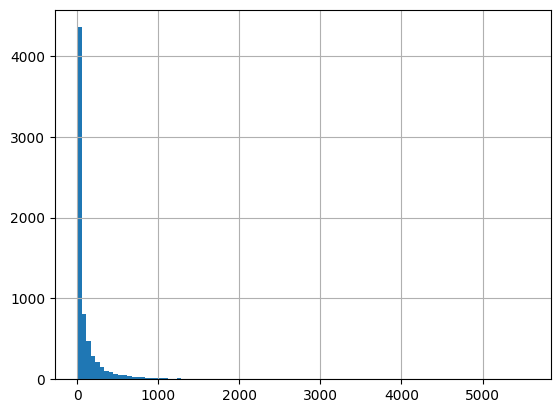

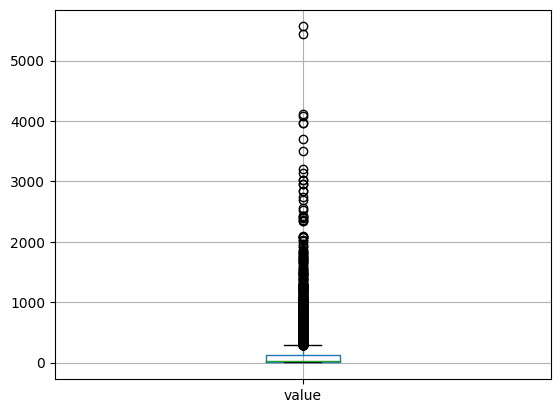

In [74]:
#Summary Stats

print(df_group['value'].sum())
print(df.shape)

df_group['value'].describe()

df_group['value'].hist(bins=100)
plt.show()

b_plot = df_group.boxplot(column='value') 
b_plot.plot()

df_group['value'].sort_index().value_counts()
df_group.to_csv('df_groupby_final.csv')

In [75]:
df_group['value'].sort_index().value_counts()

1       676
2       281
3       194
4       187
5       153
       ... 
1021      1
1229      1
571       1
429       1
234       1
Name: value, Length: 800, dtype: int64

In [79]:
# Add coordinates by merging with original data
stations = df_cleaned[['start_station_name', 'start_lat', 'start_lng',
                       'end_station_name', 'end_lat', 'end_lng']]

# Drop duplicates to get unique coords
stations_unique = stations.drop_duplicates(subset=['start_station_name', 'end_station_name'])

# Merge to get coords into df_group
df_group = df_group.merge(stations_unique, on=['start_station_name', 'end_station_name'], how='left')


In [80]:
df_group.to_csv('df_groupby_final.csv')

In [93]:
df_group.rename(columns = {'value': 'trips', 'start_lng' : 'start_lon','end_lng' : 'end_lon'}, inplace = True)
df_group.head()

,start_station_name,end_station_name,trips,start_lat,start_lon,end_lat,end_lon
0,11 St & Washington St,11 St & Washington St,1132,40.749985,-74.02715,40.749985,-74.027150
1,11 St & Washington St,12 Ave & W 40 St,1,40.749985,-74.02715,40.760875,-74.002777
2,11 St & Washington St,12 St & Sinatra Dr N,253,40.749985,-74.02715,40.750604,-74.024020
3,11 St & Washington St,14 St Ferry - 14 St & Shipyard Ln,395,40.749985,-74.02715,40.752961,-74.024353
4,11 St & Washington St,4 St & Grand St,350,40.749985,-74.02715,40.742258,-74.035111


## Initialize an instance of a kepler.gl map

In [99]:
# Load a map with data and config and height
from keplergl import KeplerGl
m= KeplerGl(height=700, data={"data_1":df_group}, config=config)
m


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data_1':          start_station_name                   end_station_name  trips  \
0     11 St …

In [100]:
config = m.config

In [101]:
config

{}

In [102]:
import json
with open("config.json", "w") as outfile:
    json.dump(config, outfile)

In [98]:
m.save_to_html(file_name='bike_trips_map.html', read_only = False, config = config)

Map saved to bike_trips_map.html!
